<a href="https://colab.research.google.com/github/mohIITech/learning_machine_learning/blob/colab/graduate_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mohansacharya_graduate_admissions_path = kagglehub.dataset_download('mohansacharya/graduate-admissions')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [ ]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.drop(columns=['Serial No.', 'University Rating'], inplace=True)

In [ ]:
df.shape

(500, 7)

In [ ]:
df.isnull().sum()

GRE Score           0
TOEFL Score         0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE Score         500 non-null    int64  
 1   TOEFL Score       500 non-null    int64  
 2   SOP               500 non-null    float64
 3   LOR               500 non-null    float64
 4   CGPA              500 non-null    float64
 5   Research          500 non-null    int64  
 6   Chance of Admit   500 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
X

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,337,118,4.5,4.5,9.65,1
1,324,107,4.0,4.5,8.87,1
2,316,104,3.0,3.5,8.00,1
3,322,110,3.5,2.5,8.67,1
4,314,103,2.0,3.0,8.21,0
...,...,...,...,...,...,...
495,332,108,4.5,4.0,9.02,1
496,337,117,5.0,5.0,9.87,1
497,330,120,4.5,5.0,9.56,1
498,312,103,4.0,5.0,8.43,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(400, 6)

In [ ]:
# here we used MinMaxScaler because upper and lower boundaries are well known from the domain knowledge

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[ 0.46      ,  0.5       ,  0.375     ,  0.14285714,  0.5224359 ,
         0.        ],
       [ 0.44      ,  0.53571429,  0.5       ,  0.42857143,  0.53205128,
         1.        ],
       [ 0.98      ,  0.96428571,  0.875     ,  0.71428571,  0.92948718,
         0.        ],
       [ 0.52      ,  0.53571429,  0.625     ,  0.57142857,  0.58974359,
         1.        ],
       [ 0.7       ,  0.64285714,  0.875     ,  0.71428571,  0.69230769,
         1.        ],
       [ 0.42      ,  0.32142857,  0.375     ,  0.57142857,  0.49358974,
         1.        ],
       [ 0.6       ,  0.42857143,  0.5       ,  0.57142857,  0.62179487,
         1.        ],
       [ 0.74      ,  0.39285714,  0.75      ,  0.71428571,  0.48076923,
         1.        ],
       [ 0.62      ,  0.67857143,  0.625     ,  0.71428571,  0.65064103,
         1.        ],
       [ 0.56      ,  0.5       ,  0.75      ,  0.71428571,  0.35897436,
         1.        ],
       [ 0.48      ,  0.53571429,  0.375     ,  0.

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(6, activation='relu', input_dim=6))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.4350 - val_loss: 1.4150
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2758 - val_loss: 1.2431
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0784 - val_loss: 1.0928
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0326 - val_loss: 0.9630
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8230 - val_loss: 0.8407
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7333 - val_loss: 0.7064
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6110 - val_loss: 0.5731
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5078 - val_loss: 0.4391
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3645 - val_loss: 0.3288
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2843 - val_loss: 0.2551
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2105 - val_loss: 0.2098
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

In [ ]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6701012378053812

In [ ]:
import matplotlib.pyplot as plt

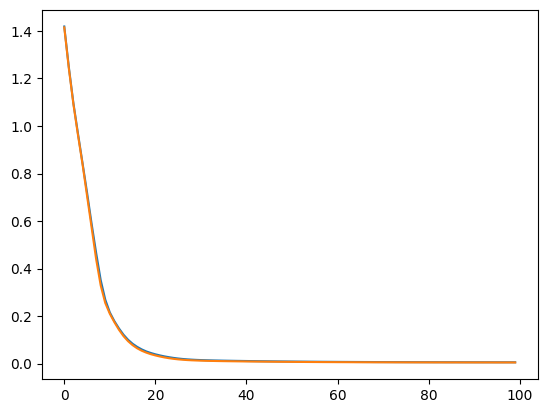

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])